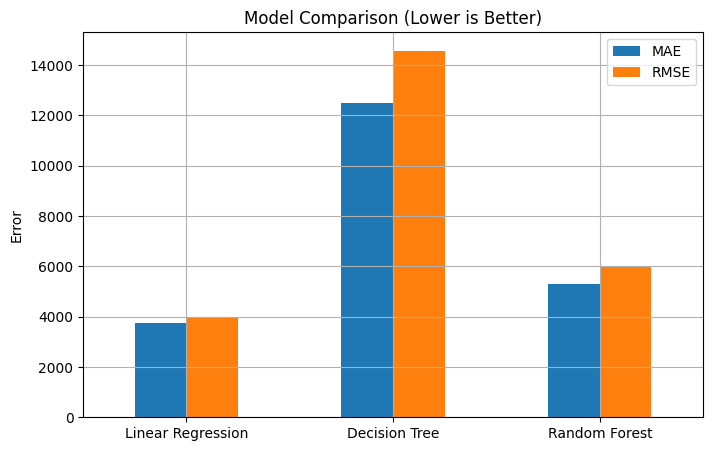

In [14]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

#Load Dataset
df = pd.read_csv("../data/salary_data.csv")
df.head()
#Features and Targets
X = df.drop("salary", axis=1)
y = df["salary"]
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Preprocessing
numeric_features = ["experience", "age"]
categorical_features = ["education"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

#training and evaluation

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results[name] = {"MAE": mae, "RMSE": rmse}

 #result and tab
results_df = pd.DataFrame(results).T
results_df

#visualization
results_df.plot(kind="bar", figsize=(8,5))
plt.title("Model Comparison (Lower is Better)")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid()
plt.show()





